In [1]:
!unzip /content/drive/MyDrive/melanoma_cancer_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Malignant/1530.jpg  
  inflating: train/Malignant/1531.jpg  
  inflating: train/Malignant/1532.jpg  
  inflating: train/Malignant/1533.jpg  
  inflating: train/Malignant/1534.jpg  
  inflating: train/Malignant/1535.jpg  
  inflating: train/Malignant/1536.jpg  
  inflating: train/Malignant/1537.jpg  
  inflating: train/Malignant/1538.jpg  
  inflating: train/Malignant/1539.jpg  
  inflating: train/Malignant/154.jpg  
  inflating: train/Malignant/1540.jpg  
  inflating: train/Malignant/1541.jpg  
  inflating: train/Malignant/1542.jpg  
  inflating: train/Malignant/1543.jpg  
  inflating: train/Malignant/1544.jpg  
  inflating: train/Malignant/1545.jpg  
  inflating: train/Malignant/1546.jpg  
  inflating: train/Malignant/1547.jpg  
  inflating: train/Malignant/1548.jpg  
  inflating: train/Malignant/1549.jpg  
  inflating: train/Malignant/155.jpg  
  inflating: train/Malignant/1550.jpg  
  inflating: train/Malignant/15

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_ds = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_ds = ImageDataGenerator(rescale=1./255)

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/train',
  validation_split=0.8,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11879 files belonging to 2 classes.
Using 2376 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Benign', 'Malignant']


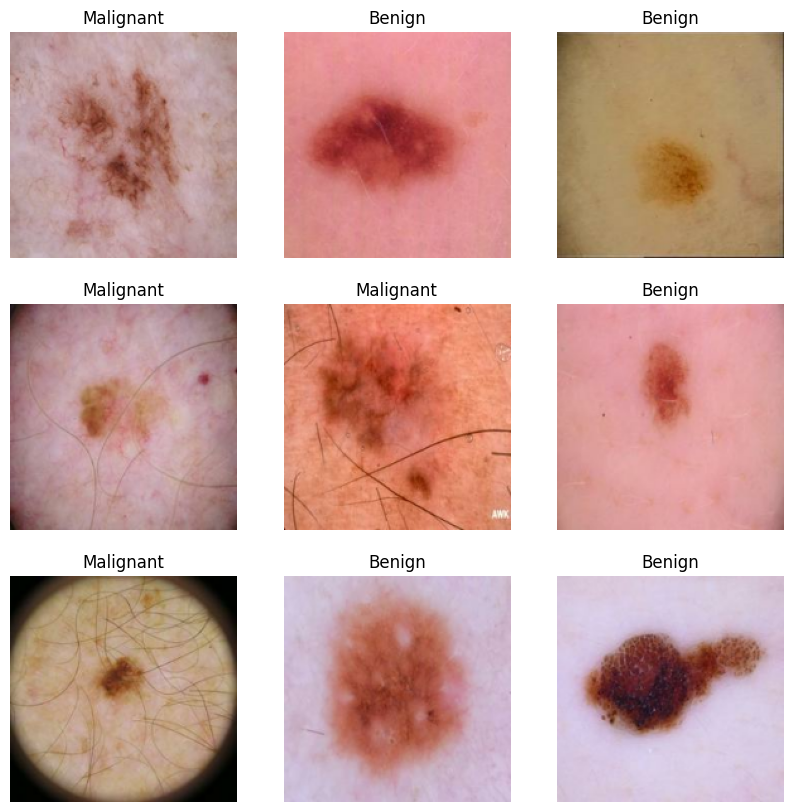

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.05321007 1.0


In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
75/75 [==============================] - 2s 20ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.7986 - val_accuracy: 0.8650
Epoch 2/50
75/75 [==============================] - 1s 19ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.7429 - val_accuracy: 0.8625
Epoch 3/50
75/75 [==============================] - 2s 21ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8274 - val_accuracy: 0.8500
Epoch 4/50
75/75 [==============================] - 2s 20ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8396 - val_accuracy: 0.8500
Epoch 5/50
75/75 [==============================] - 1s 19ms/step - loss: 7.6619e-04 - accuracy: 1.0000 - val_loss: 0.8393 - val_accuracy: 0.8525
Epoch 6/50
75/75 [==============================] - 1s 19ms/step - loss: 6.6423e-04 - accuracy: 1.0000 - val_loss: 0.8385 - val_accuracy: 0.8625
Epoch 7/50
75/75 [==============================] - 2s 23ms/step - loss: 5.2751e-04 - accuracy: 1.0000 - val_loss: 0.8651 - val_accuracy: 0.8525
E

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

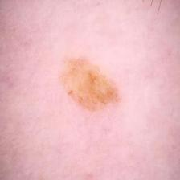

In [19]:

from tensorflow.keras.preprocessing import image

img = image.load_img('/content/test/Benign/6328.jpg',target_size=(img_height,img_width))
img

In [20]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 291ms/step


array([0])

In [21]:
prediction = class_names[result[0]]
prediction

'Benign'

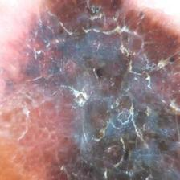

In [22]:
img = image.load_img('/content/test/Malignant/5630.jpg',target_size=(img_height,img_width))
img

In [23]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 27ms/step


array([1])

In [24]:
prediction1 = class_names[result[0]]
prediction1

'Malignant'

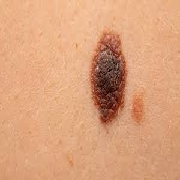

In [26]:
img = image.load_img('/content/malignant 1.jpeg',target_size=(img_height,img_width))
img

In [27]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 18ms/step


array([1])

In [28]:
prediction4 = class_names[result[0]]
prediction4

'Malignant'

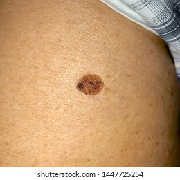

In [30]:
img = image.load_img('/content/benign2.webp',target_size=(img_height,img_width))
img

In [31]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 17ms/step


array([0])

In [32]:
prediction5 = class_names[result[0]]
prediction5

'Benign'

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [34]:
test_ds = tf.keras.utils.image_dataset_from_directory('/content/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [35]:
true_labels = []
predicted_labels = []

In [36]:
for images, labels in test_ds:
    predicted_batch = model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 31ms/step


In [37]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.855


In [38]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.84      0.89      0.86       204
   Malignant       0.88      0.82      0.85       196

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



In [39]:
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[181  23]
 [ 35 161]]


# **Transfer Learning**
**Resnet** **50**

In [40]:
# Save the model's architecture to a JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [41]:
# Save the model's weights to an HDF5 file
model.save_weights("model_weights.h5")

In [42]:
# Assume that you want to store the model files in your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Copy the model files to your Google Drive
!cp model.json "/content/drive/My Drive/"
!cp model_weights.h5 "/content/drive/My Drive/"

In [44]:
# Now, let's simulate a new Colab session and load the model

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
from tensorflow.keras.models import model_from_json

In [46]:
# Load the model's architecture
with open("/content/drive/MyDrive/model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

In [47]:
# Load the model's weights
loaded_model.load_weights("/content/drive/My Drive/model_weights.h5")

In [48]:
# Compile the model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [50]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(num_classes))

94765736/94765736 [==============================] - 1s 0us/step


In [51]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               262272    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 258       
 apper)                                                          
                                                                 
Total params: 23850242 (90.98 MB)
Trainable params: 262530 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [52]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [54]:
epochs=50
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
75/75 [==============================] - 6s 86ms/step - loss: 2.6176e-04 - accuracy: 1.0000 - val_loss: 0.5775 - val_accuracy: 0.8600
Epoch 2/50
75/75 [==============================] - 6s 81ms/step - loss: 2.4678e-04 - accuracy: 1.0000 - val_loss: 0.5817 - val_accuracy: 0.8575
Epoch 3/50
75/75 [==============================] - 6s 87ms/step - loss: 2.3696e-04 - accuracy: 1.0000 - val_loss: 0.5851 - val_accuracy: 0.8625
Epoch 4/50
75/75 [==============================] - 6s 87ms/step - loss: 2.1668e-04 - accuracy: 1.0000 - val_loss: 0.5858 - val_accuracy: 0.8650
Epoch 5/50
75/75 [==============================] - 7s 87ms/step - loss: 2.0494e-04 - accuracy: 1.0000 - val_loss: 0.5874 - val_accuracy: 0.8625
Epoch 6/50
75/75 [==============================] - 6s 80ms/step - loss: 1.9232e-04 - accuracy: 1.0000 - val_loss: 0.5982 - val_accuracy: 0.8600
Epoch 7/50
75/75 [==============================] - 6s 79ms/step - loss: 1.8253e-04 - accuracy: 1.0000 - val_loss: 0.5971 - val_ac

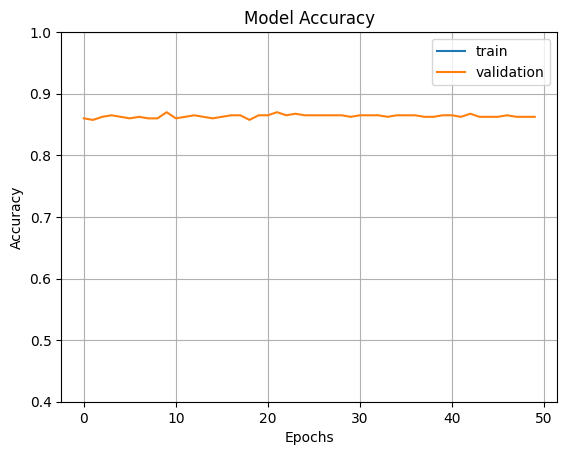

In [55]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

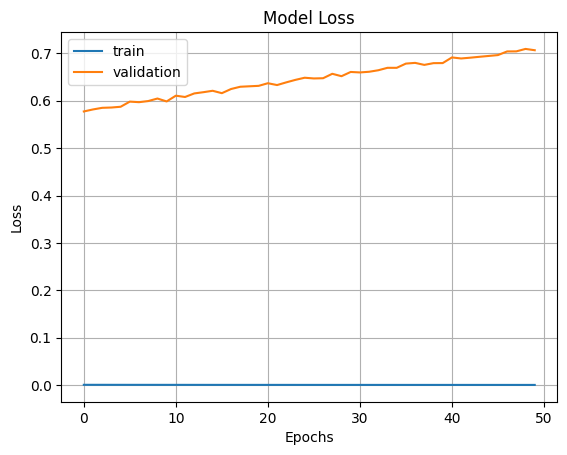

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

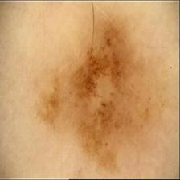

In [58]:
from tensorflow.keras.preprocessing import image

img1 = image.load_img('/content/test/Benign/6301.jpg',target_size=(img_height,img_width))
img1

In [59]:
test_image=image.img_to_array(img1)
test_image=np.expand_dims(test_image, axis = 0)
result =np.argmax(resnet_model.predict(test_image), axis=1)
result

1/1 [==============================] - 2s 2s/step


array([0])

In [60]:
predictions1 = class_names[result[0]]
predictions1

'Benign'

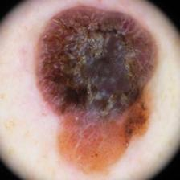

In [61]:
img2 = image.load_img('/content/test/Malignant/5603.jpg',target_size=(img_height,img_width))
img2

In [62]:
test_image=image.img_to_array(img2)
test_image=np.expand_dims(test_image, axis = 0)
result =np.argmax(resnet_model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 46ms/step


array([1])

In [63]:
predictions2 = class_names[result[0]]
predictions2

'Malignant'

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [67]:
test_ds = tf.keras.utils.image_dataset_from_directory('/content/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [68]:
true_labels = []
predicted_labels = []

In [69]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = resnet_model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 42ms/step


In [70]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8625


In [71]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.88      0.85      0.86       204
   Malignant       0.85      0.88      0.86       196

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



# **VGG 16**

In [74]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob

# Define IMAGE_SIZE and other parameters
IMAGE_SIZE = [180, 180]
BATCH_SIZE = 32


# Load the pre-trained VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in vgg.layers:
    layer.trainable = False

num_classes = len(class_names)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Scale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the custom top layers
x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)

# Create the custom model
vgg_model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate as needed
    metrics=['accuracy']
)

# Load and preprocess your dataset using the datagen
train_ds = datagen.flow_from_directory(
    '/content/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_ds = datagen.flow_from_directory(
    '/content/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [76]:
epochs=50
history = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=75,
    epochs=epochs
)

Epoch 1/50
75/75 [==============================] - 42s 561ms/step - loss: 0.5252 - accuracy: 0.7525 - val_loss: 0.5259 - val_accuracy: 0.7365
Epoch 2/50
75/75 [==============================] - 43s 550ms/step - loss: 0.4711 - accuracy: 0.7840 - val_loss: 0.5008 - val_accuracy: 0.7490
Epoch 3/50
75/75 [==============================] - 41s 553ms/step - loss: 0.4260 - accuracy: 0.8167 - val_loss: 0.4949 - val_accuracy: 0.7325
Epoch 4/50
75/75 [==============================] - 41s 551ms/step - loss: 0.4202 - accuracy: 0.8092 - val_loss: 0.4552 - val_accuracy: 0.7815
Epoch 5/50
75/75 [==============================] - 45s 597ms/step - loss: 0.4011 - accuracy: 0.8313 - val_loss: 0.4421 - val_accuracy: 0.7865
Epoch 6/50
75/75 [==============================] - 69s 925ms/step - loss: 0.4072 - accuracy: 0.8146 - val_loss: 0.4533 - val_accuracy: 0.7650
Epoch 7/50
75/75 [==============================] - 46s 620ms/step - loss: 0.4020 - accuracy: 0.8213 - val_loss: 0.4687 - val_accuracy: 0.7550

In [77]:
import matplotlib.pyplot as plt

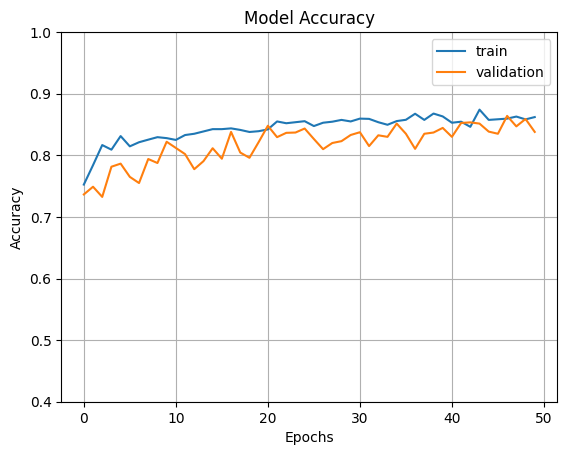

In [81]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

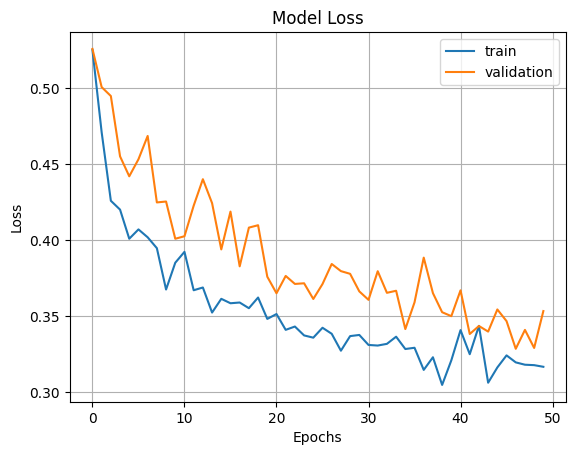

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

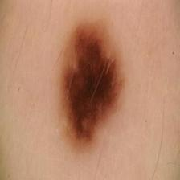

In [82]:
from tensorflow.keras.preprocessing import image

img3 = image.load_img('/content/test/Benign/6306.jpg',target_size=(img_height,img_width))
img3

In [83]:
test_image=image.img_to_array(img3)
test_image=np.expand_dims(test_image, axis = 0)
result =np.argmax(vgg_model.predict(test_image), axis=1)
result

1/1 [==============================] - 1s 1s/step


array([0])

In [84]:
predictions2 = class_names[result[0]]
predictions2

'Benign'

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [87]:
test_ds = tf.keras.utils.image_dataset_from_directory('/content/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [88]:
true_labels = []
predicted_labels = []

In [89]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = vgg_model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 21ms/step


In [90]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.705


In [91]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.65      0.93      0.76       204
   Malignant       0.87      0.47      0.61       196

    accuracy                           0.70       400
   macro avg       0.76      0.70      0.69       400
weighted avg       0.75      0.70      0.69       400

